# Time Series Analysis and Forecasting on Walmart (Store 01)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk

In [4]:
df = pd.read_csv('Store01_dataset.csv')

In [5]:
df['Date']

0      05-02-2010
1      12-02-2010
2      19-02-2010
3      26-02-2010
4      05-03-2010
          ...    
138    28-09-2012
139    05-10-2012
140    12-10-2012
141    19-10-2012
142    26-10-2012
Name: Date, Length: 143, dtype: object

### Data Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


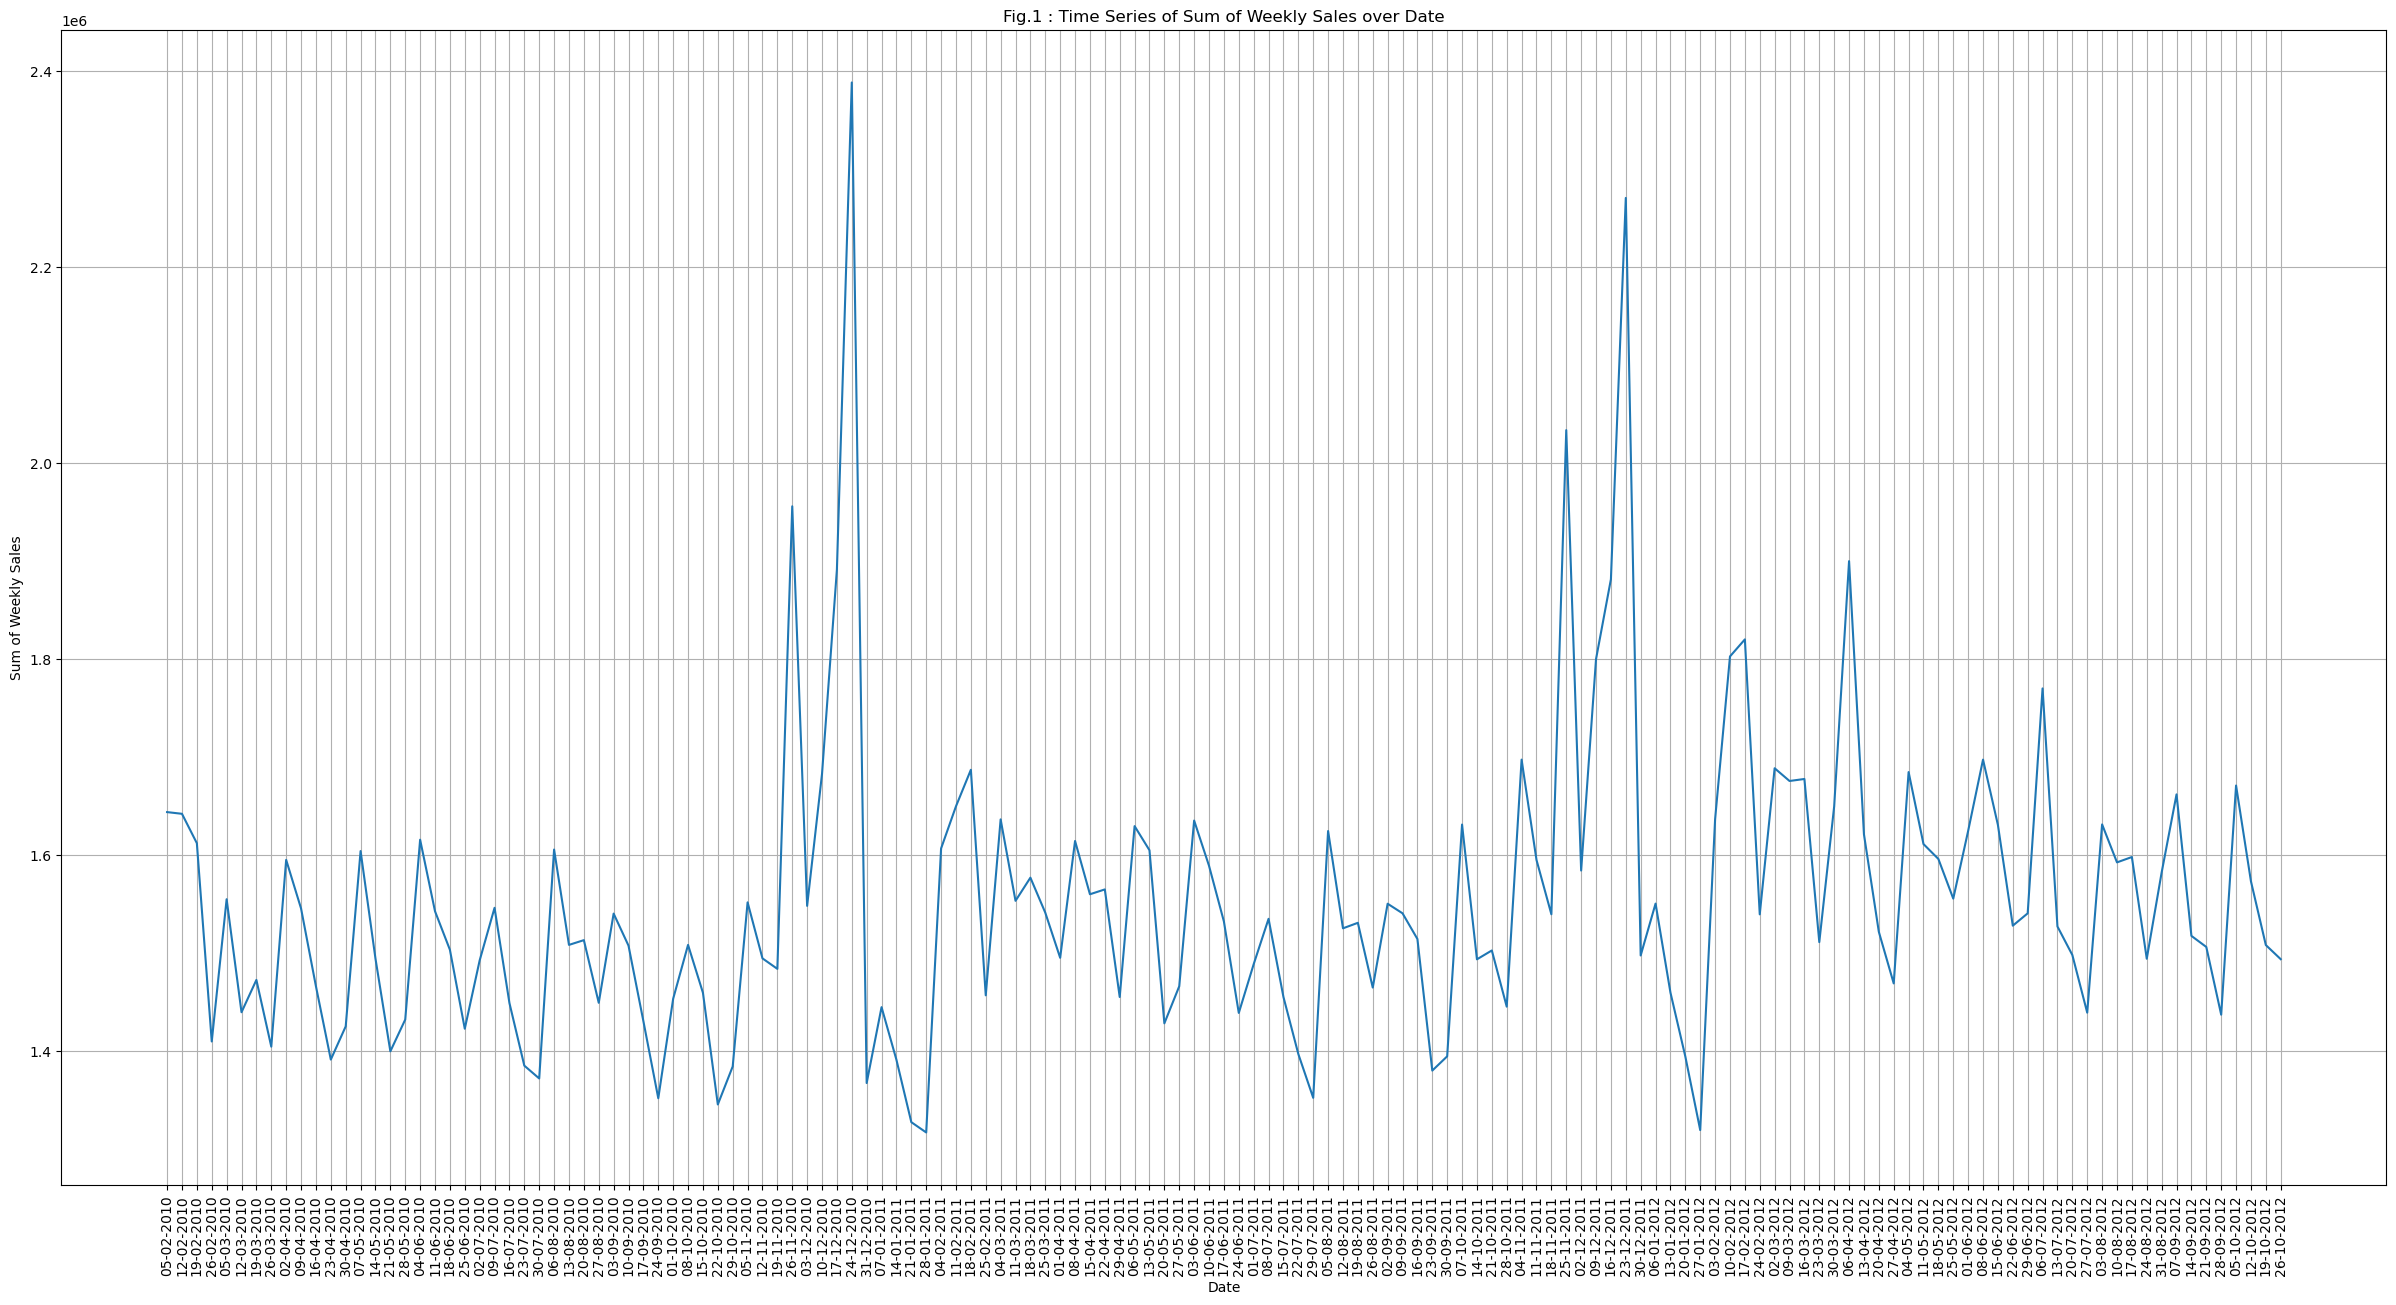

In [22]:
# Plot the time series
plt.figure(figsize=(30, 15))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Sum of Weekly Sales')
plt.title('Fig.1 : Time Series of Sum of Weekly Sales over Date')
plt.grid()
plt.show()

In [24]:
time_series = df['Weekly_Sales']
time_series

0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

### White Noise Test
#### Ljung Box Test

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test -- White Noise Test
ljung_test = acorr_ljungbox(time_series, lags=[10], return_df=True)

print(ljung_test)     # White Noise if p-value > 0.05

      lb_stat  lb_pvalue
10  29.692134   0.000962


##### The Time Series data is not white noise, meaning it has some underlying pattern.
##### Since the data is not purely random, we can apply forecasting models to predict future values.


### Seasonal Decompostion 

Text(0.5, 1.0, 'Fig. 3 : Decompostion of the Time Series into its components (for Additive Model)\n')

<Figure size 1200x1000 with 0 Axes>

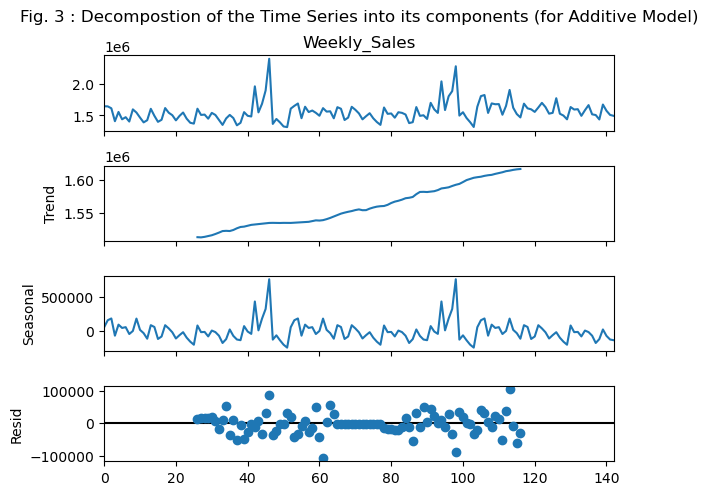

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12,10))
decomposition_add = seasonal_decompose(time_series, model = 'additive', period = 52)
decomposition_add.plot()
plt.title('Fig. 3 : Decompostion of the Time Series into its components (for Additive Model)\n',pad = 250, position = (0.5,0.2))

Text(0.5, 1.0, 'Fig. 3 : Decompostion of the Time Series into its components (for Multiplicative Model)\n')

<Figure size 1200x1000 with 0 Axes>

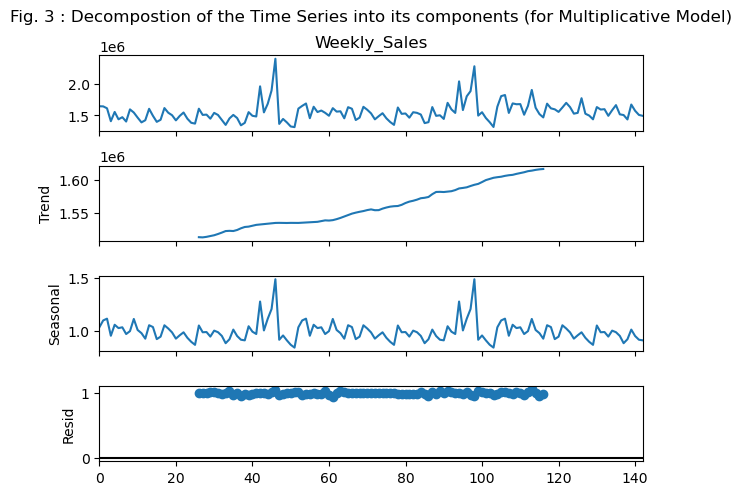

In [33]:
plt.figure(figsize=(12,10))
decomposition_mul = seasonal_decompose(time_series, model = 'multiplicative', period = 52)
decomposition_mul.plot()
plt.title('Fig. 3 : Decompostion of the Time Series into its components (for Multiplicative Model)\n',pad = 250, position = (0.5,0.2))

In [35]:
print(np.var(decomposition_add.resid))
print(np.var(decomposition_mul.resid))

1056934162.2734085
0.0003785427330032096


##### The variability of the residuals in the multiplicative mode is smalller. So we choose the time series data is following multiplicative model.

In [38]:
time_series = np.array(time_series)

Text(0.5, 1.0, 'Fig.5.1 : Correlogram of the Time Series data')

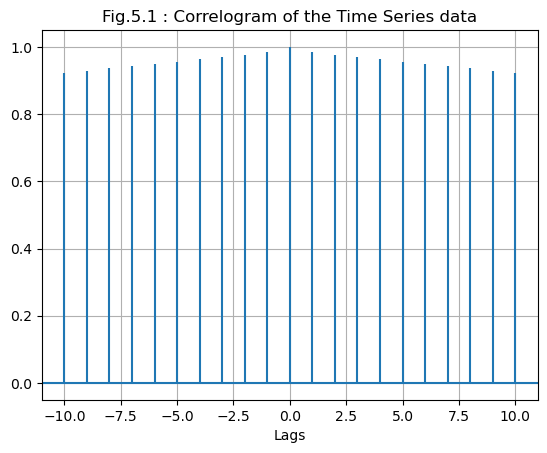

In [40]:
plt.acorr(time_series)
plt.xlabel('Lags')
plt.grid(True)
plt.title('Fig.5.1 : Correlogram of the Time Series data')

### Sationarity Test
#### ADF Test

In [43]:
# Perform ADF Test
from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(time_series)
print('ADF Statistic = ', adf_results[0])   # ADF Statistic
print('p-value = ', adf_results[1])   # Stationary if p-value < 0.5

ADF Statistic =  -5.1021861451922845
p-value =  1.3877788330759666e-05


#### KPSS Test

In [46]:
# Perform KPSS Test
from statsmodels.tsa.stattools import kpss

statistic, p_value, n_lags, critical_values = kpss(time_series, regression='ct')

print('KPSS Statistic:', statistic)
print('p-value:', p_value)   # Stationary if p-value >= 0.05

KPSS Statistic: 0.06536442851675832
p-value: 0.1


C:\Users\hp\AppData\Local\Temp\ipykernel_14064\3972300085.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(time_series, regression='ct')


##### The time series data is stationary.

### Fitting Trend Line over the Time Series data

In [50]:
time_index = np.arange(0, len(time_series))
time_index_add_constant = sm.add_constant(time_index)
trend_line = sm.OLS(time_series, time_index_add_constant).fit()
print(trend_line.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     6.803
Date:                Tue, 18 Mar 2025   Prob (F-statistic):             0.0101
Time:                        17:33:19   Log-Likelihood:                -1909.0
No. Observations:                 143   AIC:                             3822.
Df Residuals:                     141   BIC:                             3828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.498e+06   2.54e+04     58.888      0.0

Text(0.5, 1.0, 'Trend Line of the AURUKM data')

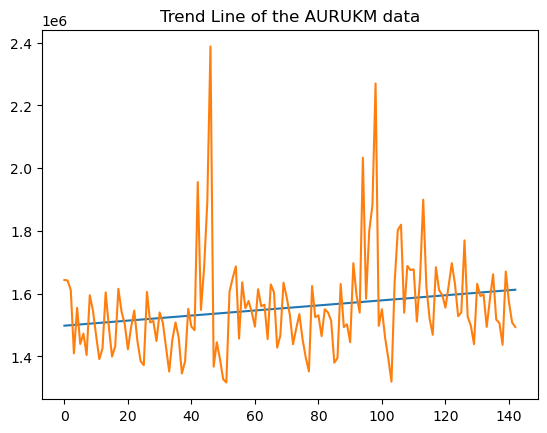

In [52]:
plt.plot(time_index, trend_line.predict(time_index_add_constant))
plt.plot(time_index, time_series)
plt.title('Trend Line of the AURUKM data')

### Detrend using Moving Average Method

In [55]:
# Using Moving Average to detrend
window = 4
time_series = pd.Series(time_series)
sales_ma = time_series.rolling(window = window).mean()
sales_detrend = (time_series - sales_ma).dropna()
adf_results = adfuller(time_series)
print(adf_results[1])

1.3877788330759666e-05


Text(0.5, 1.0, 'Original Time Series vs. Detrended Series (Moving Average)')

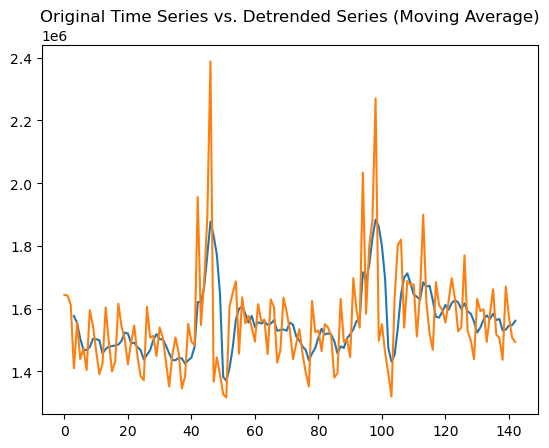

In [57]:
plt.plot(time_index, sales_ma)
plt.plot(time_index, time_series)
plt.title('Original Time Series vs. Detrended Series (Moving Average)')

### Model Training & Evaluation: 113 Data Points for Training, 30 for Testing  


In [60]:
train_data , test_data = time_series[:-30], time_series[-30:]

### Time Series Forecasting Models
#### AR Model

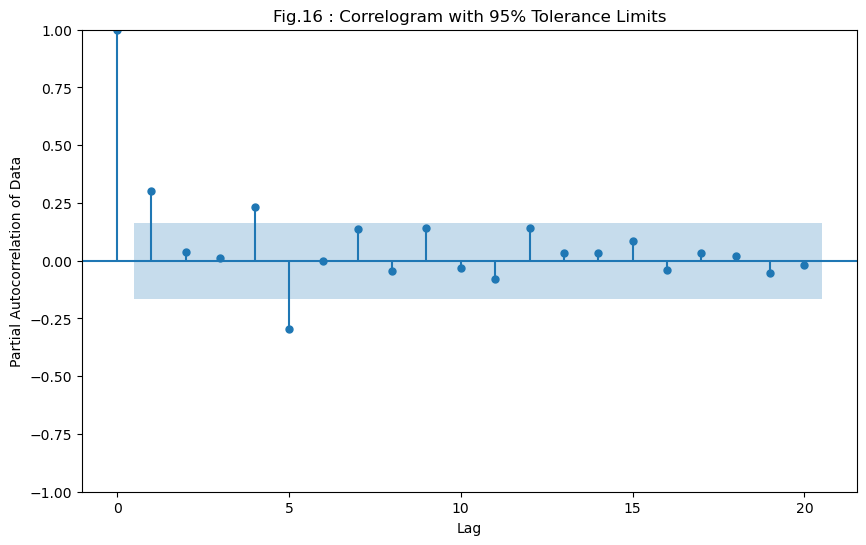

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(time_series, lags=20, alpha=0.05, ax=ax)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation of Data')
plt.title('Fig.16 : Correlogram with 95% Tolerance Limits')
plt.show()

##### Hence we choose p = 2. As after 2 lags it goes into the confidence interval.
##### Thus we have AR(2) model.

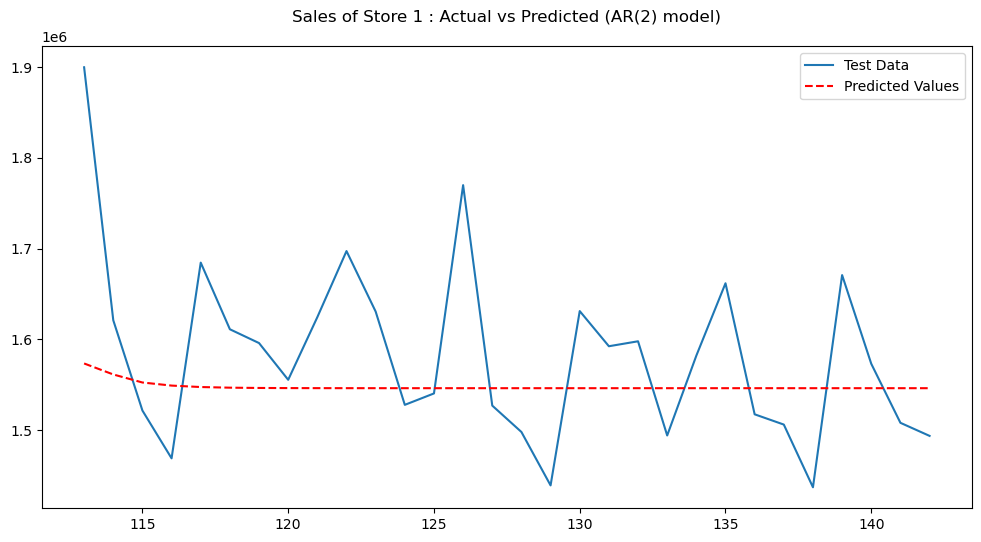

RMSE =  101258.73
SMAPE = 4.80%


In [66]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Fit Autoregressive model to the train data.
AR_model = AutoReg(train_data, lags = 2)
AR_model_fit = AR_model.fit()

AR_predictions = AR_model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, AR_predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Sales of Store 1 : Actual vs Predicted (AR(2) model)\n',pad = 5, position = (0.5,0.2))
plt.show()

# Evaluating Model using RMSE score

rmse_ar = round(np.sqrt(mean_squared_error(test_data, AR_predictions)), 2)
print('RMSE = ', rmse_ar)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, AR_predictions):.2f}%")


#### MA Model

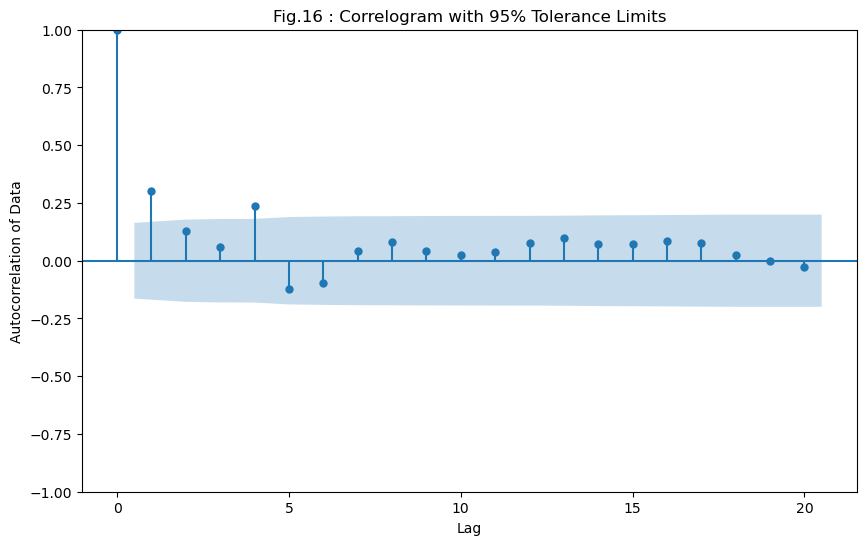

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(time_series, lags=20, alpha=0.05, ax=ax)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation of Data')
plt.title('Fig.16 : Correlogram with 95% Tolerance Limits')
plt.show()

##### Hence we choose p = 2. As after 2 lags it goes into the confidence interval.
##### Thus we have MA(2) model.


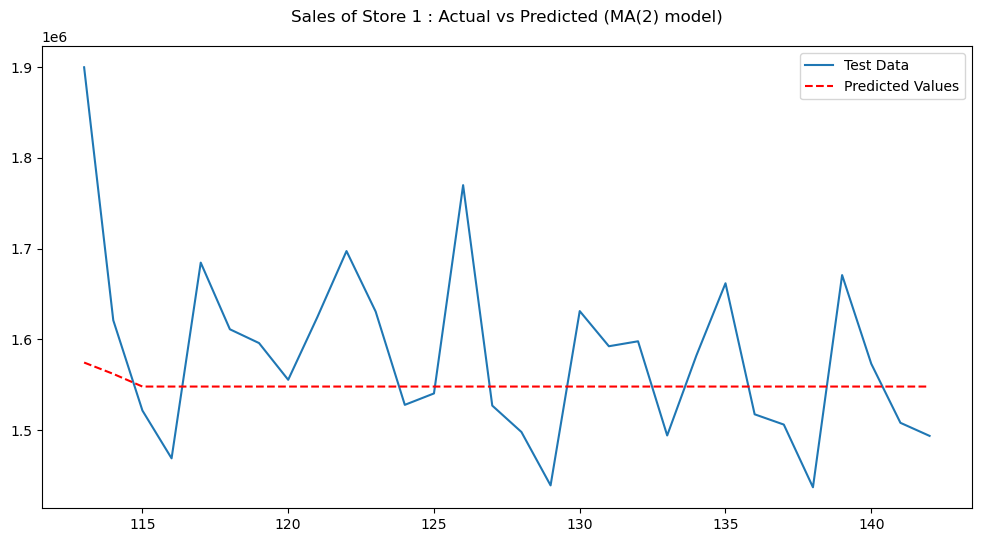

RMSE =  100701.84
SMAPE = 4.78%


In [72]:
from statsmodels.tsa.arima.model import ARIMA

# Fit Moving Average model to train data
MA_model = ARIMA(train_data, order = (0,0,2))
MA_model_fit = MA_model.fit()

MA_predictions = MA_model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, MA_predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Sales of Store 1 : Actual vs Predicted (MA(2) model)\n',pad = 5, position = (0.5,0.2))
plt.show()

# Evaluating Model using RMSE score

rmse_ma = round(np.sqrt(mean_squared_error(test_data, MA_predictions)), 2)
print('RMSE = ', rmse_ma)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, MA_predictions):.2f}%")


##### RMSE of the MA(2) model is least compared to RMSE of the AR(2) model.
##### MAPE of the MA(2) model is least compared to MAPE of the AR(2) model.

#### ARMA Model

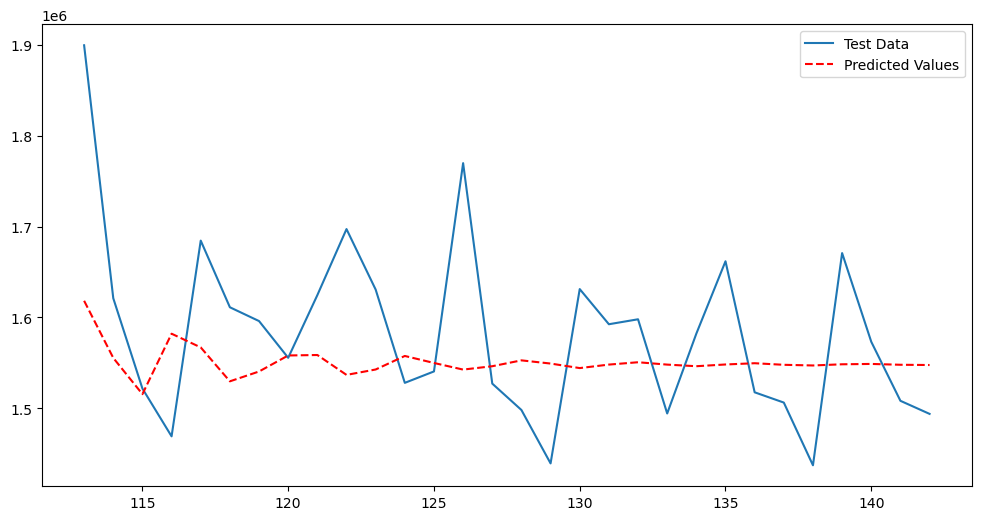

RMSE =  98279.21
SMAPE = 4.80%


In [76]:
from statsmodels.tsa.arima.model import ARIMA

# Fit Moving Average model to train data
ARMA_model = ARIMA(train_data, order = (5,0,4))
ARMA_model_fit = ARMA_model.fit()

ARMA_predictions = ARMA_model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, ARMA_predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.show()

# Evaluating Model using RMSE score

rmse_arma = round(np.sqrt(mean_squared_error(test_data, ARMA_predictions)), 2)
print('RMSE = ', rmse_arma)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, ARMA_predictions):.2f}%")


##### RMSE of the ARMA(5,4) model is least compared to RMSE of the AR(2) model.
##### MAPE of the ARMA(5,4) model is least compared to MAPE of the AR(2) model.

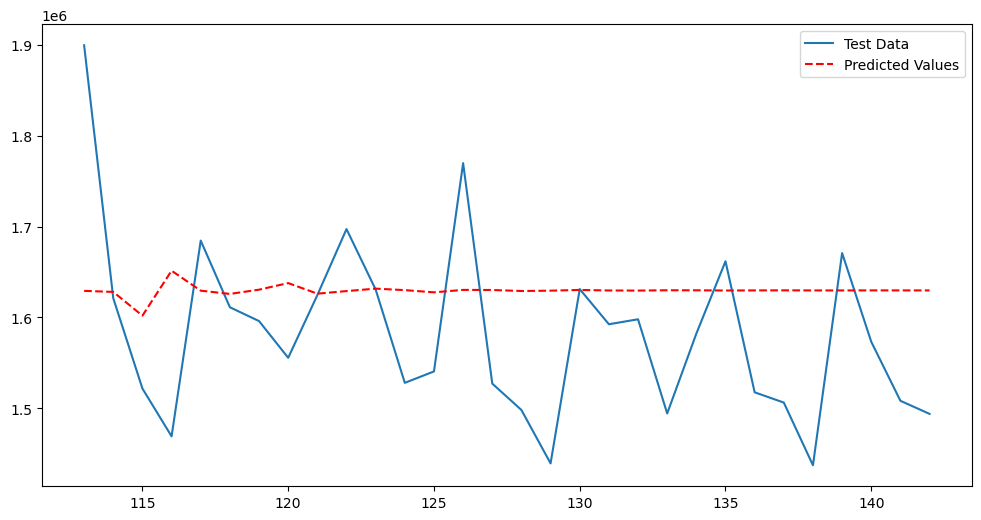

RMSE =  109185.35
SMAPE = 4.80%


In [79]:
from statsmodels.tsa.arima.model import ARIMA

# Fit Moving Average model to train data
ARIMA_model = ARIMA(train_data, order = (5,1,4))
ARIMA_model_fit = ARIMA_model.fit()

ARIMA_predictions = ARIMA_model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, ARIMA_predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.show()

# Evaluating Model using RMSE score

rmse_arima = round(np.sqrt(mean_squared_error(test_data, ARIMA_predictions)), 2)
print('RMSE = ', rmse_arima)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, ARMA_predictions):.2f}%")


##### No such imporvement observed.

#### SARIMA Model

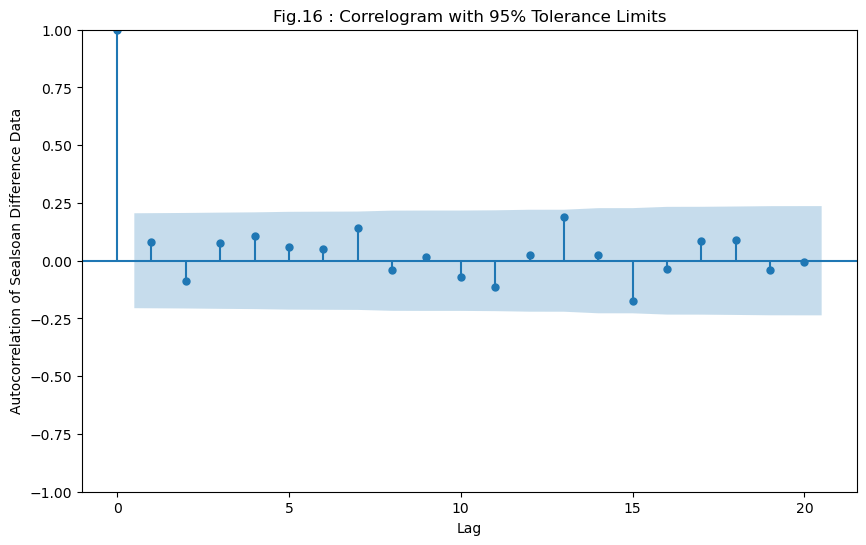

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(time_series.diff(52).dropna(), lags=20, alpha=0.05, ax=ax)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation of Sealsoan Difference Data')
plt.title('Fig.16 : Correlogram with 95% Tolerance Limits')
plt.show()

##### We choose Q = 1. As after 1 lags it goes into the confidence interval.

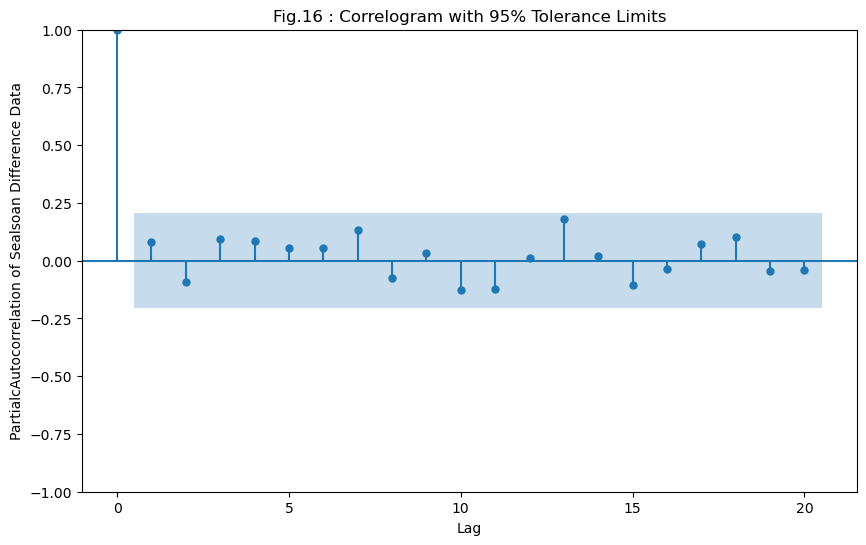

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(time_series.diff(52).dropna(), lags=20, alpha=0.05, ax=ax)

plt.xlabel('Lag')
plt.ylabel('PartialcAutocorrelation of Sealsoan Difference Data')
plt.title('Fig.16 : Correlogram with 95% Tolerance Limits')
plt.show()

##### We choose P = 1. As after 1 lags it goes into the confidence interval.

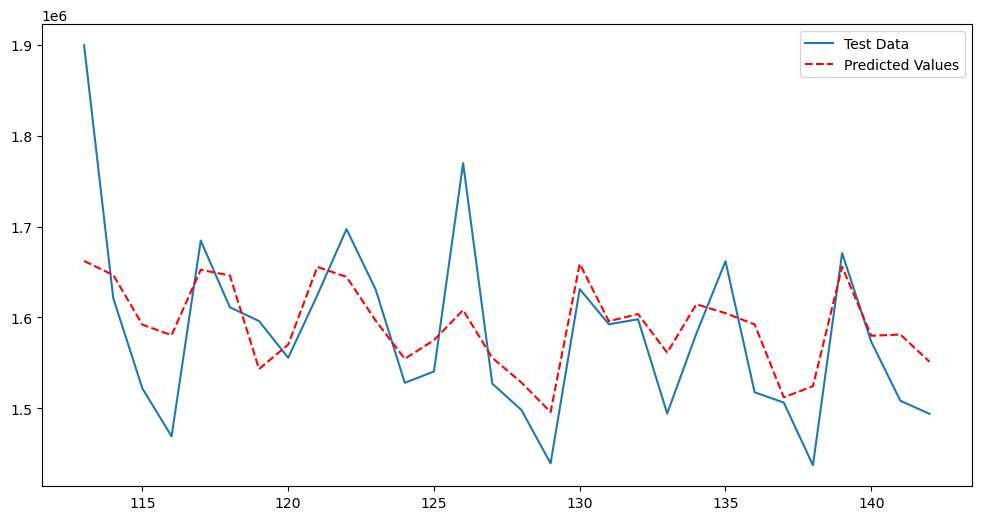

RMSE =  70561.73
SMAPE = 3.22%
Model Accuracy = 96.78%


In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit Moving Average model to train data
SARIMA_model = SARIMAX(train_data, order = (5,0,4), seasonal_order = (1,0,1,52))    # s = 52. We have weekly data.
SARIMA_model_fit = SARIMA_model.fit()

SARIMA_predictions = SARIMA_model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, SARIMA_predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.show()

# Evaluating Model using RMSE score

rmse_sarima = round(np.sqrt(mean_squared_error(test_data, SARIMA_predictions)), 2)
print('RMSE = ', rmse_sarima)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, SARIMA_predictions):.2f}%")

print(f"Model Accuracy = {(100 - smape(test_data, SARIMA_predictions)):.2f}%")

#### So SARIMA(5,0,4)(2,0,2)[52] model has the least RMSE and SMAPE = 3.22%. 
#### Model Accuracy = 96.78%

### Smoothing Methods

#### Holt-Winters Model

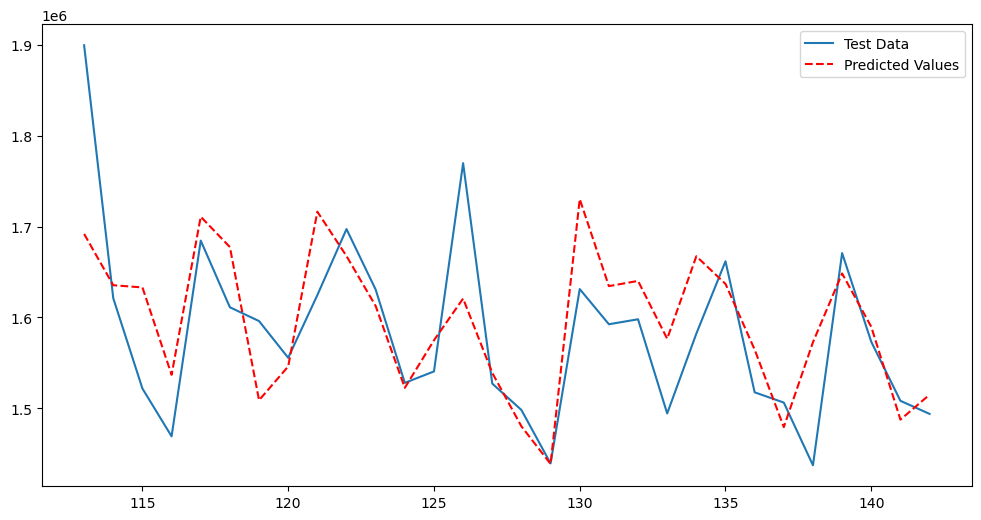

RMSE =  72515.23
SMAPE = 3.33%
Model Accuracy = 96.67%


In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = train_data
date = pd.to_datetime(df['Date'][:-30], format = "%d-%m-%Y")

ts = pd.Series(data = train_data.values, index = date)

# Fit Holt-Winters Model
model = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=52).fit()

# Forecast next 30 periods
forecast = model.forecast(30)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.show()

# Evaluating Model using RMSE score

rmse_smoothing = round(np.sqrt(mean_squared_error(test_data, forecast)), 2)
print('RMSE = ', rmse_smoothing)

# Evaluating Model using SMAPE 

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

print(f"SMAPE = {smape(test_data, forecast.values):.2f}%")

print(f"Model Accuracy = {(100 - smape(test_data, forecast.values)):.2f}%")

#### Hence Model Accuracy achived is 96.67%